In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
iris_set = sns.load_dataset("iris")

In [3]:
class_feature_means = pd.DataFrame()
for c, rows in iris_set.groupby('species'):
    class_feature_means[c] = rows.mean()
class_feature_means

,setosa,versicolor,virginica
sepal_length,5.006,5.936,6.588
sepal_width,3.428,2.770,2.974
petal_length,1.462,4.260,5.552
petal_width,0.246,1.326,2.026


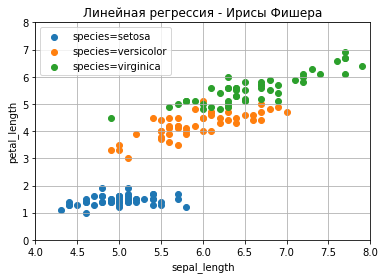

In [4]:
axes = plt.axes()
axes.set_xlim([4, 8])         
axes.set_ylim([0, 8])          
legend = []
plt.title('Линейная регрессия - Ирисы Фишера')
x_lable='sepal_length'
y_lable='petal_length'
axes.set_xlabel(x_lable)             
axes.set_ylabel(y_lable)  
for c, rows in iris_set.groupby('species'):
    plt.scatter(rows[x_lable], rows[y_lable])
    legend.append("species=%s" % c)
plt.legend(legend, loc="upper left")
plt.grid()
plt.show()

In [5]:
iris_set

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [6]:
iris_set = iris_set.drop(['sepal_width', 'petal_width'], axis=1)

In [7]:
seto = np.array(iris_set[iris_set.species == 'setosa'])
vers = np.array(iris_set[iris_set.species == 'versicolor'])

In [8]:
setosa = [[],[]]
for i in seto:
    setosa[0].append(i[0])
    setosa[1].append(i[1])
versicolor = [[],[]]
for i in vers:
    versicolor[0].append(i[0])
    versicolor[1].append(i[1])

In [9]:
mean_setosa = np.mean(setosa, axis=1).reshape(2,1)
mean_versicolor = np.mean(versicolor, axis=1).reshape(2,1)

In [10]:
scatter_setosa = np.dot((setosa-mean_setosa),(setosa-mean_setosa).T)
scatter_versicolor = np.dot((versicolor-mean_versicolor),(versicolor-mean_versicolor).T)

In [11]:
SW = scatter_setosa+scatter_versicolor
SW1=np.linalg.inv(SW)
w = np.dot(SW1, mean_setosa - mean_versicolor)

[[ 0.11335687]
 [-0.31751601]]


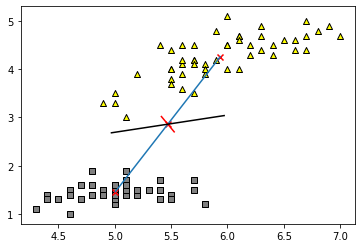

In [12]:
#Plot the data

fig, ax = plt.subplots()

ax.scatter(setosa[0],setosa[1],marker='s',c='grey',edgecolor='black')
ax.scatter(versicolor[0],versicolor[1],marker='^',c='yellow',edgecolor='black')

ax.scatter(mean_setosa[0],mean_setosa[1],marker='x',c='red',edgecolor='black')
ax.scatter(mean_versicolor[0],mean_versicolor[1],marker='x',c='red',edgecolor='black')

ax.plot((mean_setosa[0],mean_versicolor[0]), (mean_setosa[1],mean_versicolor[1] ))

mean=(mean_setosa+mean_versicolor)/2
mean1=mean+w/2
mean2=mean-w/2
ax.scatter(mean[0],mean[1],marker='x',c='red',edgecolor='black')
ax.plot((mean1[0],mean2[0]), (mean1[1],mean2[1] ), c='red' )

c=-w[0]/w[1]
u=np.array([1,c[0]]).reshape(2,1)
mean1=mean+u/2
mean2=mean-u/2
ax.plot((mean1[0],mean2[0]), (mean1[1],mean2[1] ), c='black' )

print(w)
plt.show()
